#Paute Water Balance and Drought Analysis (PART 5)

#Section 5. Partitioning Water Resources and Mapping Drought Impacts

Remote sensing data offers valuable insights into the impacts of water scarcity on the ground. By overlaying layers of water resource information with land cover data, we can:

- Partition water resources by land cover type to understand how different land uses consume water.

- Assess the impact of water shortage on specific land cover categories, such as agricultural areas.

- Evaluate the effects on crop production and food security by monitoring vegetation health and drought conditions.

- Identify potential environmental impacts on biodiversity and ecosystems.

- However, a major limitation of many remote sensing-based studies is the infrequent updates and lack of robust accuracy assessments for generated maps.


In [ ]:
# !pip install geopandas
!pip install Cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 24.3 MB/s eta 0:00:00


In [ ]:
import ee

import geemap
from geemap import cartoee
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import pandas as pd
import geopandas as gpd
import numpy as np

In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-geospatial-analyses')

In [ ]:
# Load HydroBASINS dataset
hydrobasins = ee.FeatureCollection("WWF/HydroSHEDS/v1/Basins/hybas_7")

# Define a point inside the Paute Basin (latitude, longitude)
pautePoint = ee.Geometry.Point([-78.8, -2.65])  # Approximate location in Ecuador

# Filter the basin that contains the point
pauteBasin = hydrobasins.filterBounds(pautePoint)

# Initialize the map
Map = geemap.Map()
Map.centerObject(pauteBasin, zoom=7)

# Add the basin to the map
Map.addLayer(pauteBasin, {}, "Paute Basin")

# Display the map
Map

Map(center=[-2.6561001766080143, -78.56026731888969], controls=(WidgetControl(options=['position', 'transparen…

First, we'll create an annual land cover map for the Paute Basin, starting with the year 2023.

In [ ]:
# Load the MODIS dataset
dataset = ee.ImageCollection('MODIS/061/MCD12Q1')
# Specify the year of interest
year_of_interest = 2020  # Change this to your desired year

# Filter the dataset for the specific year
landcover_image = dataset.filter(ee.Filter.calendarRange(year_of_interest, year_of_interest, 'year')).first()

# Visualization parameters
# Visualization parameters with explanations for each class
igbp_landcover_vis = {
    'min': 1.0,
    'max': 17.0,
    'palette': [
        '05450a',  # Evergreen Needleleaf Forests
        '086a10',  # Evergreen Broadleaf Forests
        '54a708',  # Deciduous Needleleaf Forests
        '78d203',  # Deciduous Broadleaf Forests
        '009900',  # Mixed Forests
        'c6b044',  # Closed Shrublands
        'dcd159',  # Open Shrublands
        'dade48',  # Woody Savannas
        'fbff13',  # Savannas
        'b6ff05',  # Grasslands
        '27ff87',  # Permanent Wetlands
        'c24f44',  # Croplands
        'a5a5a5',  # Urban and Built-up Lands
        'ff6d4c',  # Cropland/Natural Vegetation Mosaics
        '69fff8',  # Snow and Ice
        'f9ffa4',  # Barren or Sparsely Vegetated
        '1c0dff'   # Water Bodies
    ],
}

clipped_landcover = landcover_image.select('LC_Type1').clip(pauteBasin)
m = geemap.Map()
m.set_center(-78.95, -2.89, 8)  # Longitude, Latitude, Zoom Level
m.add_layer(clipped_landcover, igbp_landcover_vis, f'IGBP Land Cover {year_of_interest}')
#m.add_layer(pauteBasin, {'color': 'red'}, 'Selected AOI')
m


Map(center=[-2.89, -78.95], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

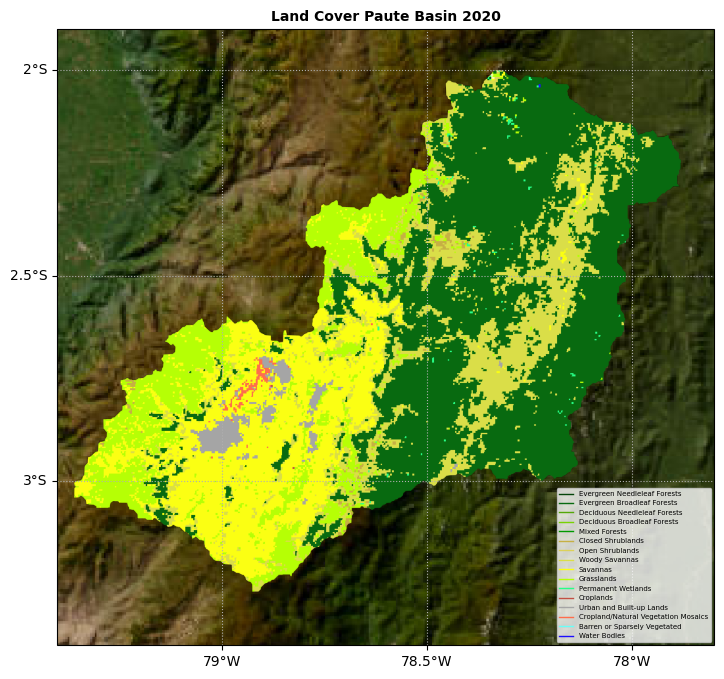

In [ ]:
# specify region to focus on
bbox = [-77.8, -3.4, -79.4, -1.9]

# Create a figure and plot using Cartoee
fig = plt.figure(figsize=(12, 8))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(clipped_landcover,  vis_params=igbp_landcover_vis, region=bbox, basemap="SATELLITE", zoom_level=8)

ax.set_title(label="Land Cover Paute Basin 2020", fontsize=10, fontweight='bold')

# add the gridlines and specify that the xtick
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add a marker for Cuenca
#ax.plot(-79, -2.9, 'ko')
#ax.text(-79, -2.9, 'Cuenca', color='white', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.5'))

# add a marker for Paute
#ax.plot(-78.7, -2.7, 'ko')
#ax.text(-78.7, -2.7, 'Paute', color='white', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.5'))

legend_elements = [Line2D([], [], color='#05450a', lw=1, label='Evergreen Needleleaf Forests'),
                   Line2D([], [], color='#086a10', lw=1, label='Evergreen Broadleaf Forests'),
                   Line2D([], [], color='#54a708', lw=1, label='Deciduous Needleleaf Forests'),
                   Line2D([], [], color='#78d203', lw=1, label='Deciduous Broadleaf Forests'),
                   Line2D([], [], color='#009900', lw=1, label='Mixed Forests'),
                   Line2D([], [], color='#c6b044', lw=1, label='Closed Shrublands'),
                   Line2D([], [], color='#dcd159', lw=1, label='Open Shrublands'),
                   Line2D([], [], color='#dade48', lw=1, label='Woody Savannas'),
                   Line2D([], [], color='#fbff13', lw=1, label='Savannas'),
                   Line2D([], [], color='#b6ff05', lw=1, label='Grasslands'),
                   Line2D([], [], color='#27ff87', lw=1, label='Permanent Wetlands'),
                   Line2D([], [], color='#c24f44', lw=1, label='Croplands'),
                   Line2D([], [], color='#a5a5a5', lw=1, label='Urban and Built-up Lands'),
                   Line2D([], [], color='#ff6d4c', lw=1, label='Cropland/Natural Vegetation Mosaics'),
                   Line2D([], [], color='#69fff8', lw=1, label='Barren or Sparsely Vegetated'),
                   Line2D([], [], color='#1c0dff', lw=1, label='Water Bodies')]

ax.legend(handles=legend_elements, loc='lower right', fontsize=5)

In [ ]:
clipped_landcover

Next, we'll calculate the average monthly precipitation (P) and evapotranspiration (ET) for each land cover category using the land cover map.

In [ ]:
def filter_image_collection(image_collection, start_date, end_date):
  """
  Filters an Earth Engine ImageCollection by date range.

  Args:
    image_collection: The input ImageCollection.
    start_date: The start date of the desired time range (ee.Date object).
    end_date: The end date of the desired time range (ee.Date object).

  Returns:
    The filtered ImageCollection.
  """

  return image_collection.filterDate(start_date, end_date)

In [ ]:
# Filters CHIRPS data
CHIRPS_ImageCollection = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD')
CHIRPS_ImageCollection = filter_image_collection(CHIRPS_ImageCollection, ee.Date('2020-01-01'), ee.Date('2020-12-31'))
CHIRPS_ImageCollection

In [ ]:
# Filters MODIS data
MODIS_ImageCollection = ee.ImageCollection('MODIS/006/MOD16A2')
MODIS_ImageCollection = MODIS_ImageCollection.select('ET');
MODIS_ImageCollection = filter_image_collection(MODIS_ImageCollection, ee.Date('2020-01-01'), ee.Date('2020-12-31'))
MODIS_ImageCollection

In [ ]:
def generate_monthly_precipitation_image_collection(chirps, years_ee, months_ee):
    """
    Generate an ImageCollection for monthly precipitation data from the CHIRPS dataset.

    Parameters:
    chirps (ee.ImageCollection): The CHIRPS dataset to filter.
    years_ee (ee.List): List of years (as integers) for the precipitation calculation.
    months_ee (ee.List): List of months (as integers) for the precipitation calculation.

    Returns:
    ee.ImageCollection: The generated ImageCollection with monthly precipitation sums.
    """
    # Generate the ImageCollection using the years and months
    monthly_precip = ee.ImageCollection.fromImages(
        years_ee.map(lambda y:
            months_ee.map(lambda m:
                ee.Image(chirps
                    .filter(ee.Filter.calendarRange(y, y, 'year'))
                    .filter(ee.Filter.calendarRange(m, m, 'month'))
                    .sum()
                    .set('year', y)
                    .set('month', m)
                    .set('system:time_start', ee.Date.fromYMD(y, m, 1))
                )
            )
        ).flatten()
    )

    return monthly_precip

In [ ]:
# Time Period
years_ee = ee.List.sequence(2020, 2020)
months_ee = ee.List.sequence(1, 12)

# Calculates Monthly Values
monthly_precip = generate_monthly_precipitation_image_collection(CHIRPS_ImageCollection, years_ee, months_ee)

In [ ]:
monthly_precip

In [ ]:
def generate_monthly_ET_image_collection(modis, years_ee, months_ee):
    """
    Generate an ImageCollection for monthly Evapotranspitration data from the MODIS dataset.

    Parameters:
    modis (ee.ImageCollection): The MODIS dataset to filter.
    years_ee (ee.List): List of years (as integers) for the precipitation calculation.
    months_ee (ee.List): List of months (as integers) for the precipitation calculation.

    Returns:
    ee.ImageCollection: The generated ImageCollection with monthly ET sums.
    """
    # Generate the ImageCollection using the years and months
    monthly_ET = ee.ImageCollection.fromImages(
        years_ee.map(lambda y:
            months_ee.map(lambda m:
                ee.Image(modis
                    .filter(ee.Filter.calendarRange(y, y, 'year'))
                    .filter(ee.Filter.calendarRange(m, m, 'month'))
                    .sum()
                    .multiply(0.1)
                    .set('year', y)
                    .set('month', m)
                    .set('system:time_start', ee.Date.fromYMD(y, m, 1))
                )
            )
        ).flatten()
    )

    return monthly_ET

In [ ]:
# Calculates Monthly Values
monthly_ET = generate_monthly_ET_image_collection(MODIS_ImageCollection, years_ee, months_ee)
monthly_ET

In [ ]:
def calculate_min_max_and_mean_image(image_collection, region, scale=500, max_pixels=1e9):
    """
    Calculate the minimum and maximum values of the mean image of an ImageCollection
    within a specified region and return the mean image.

    Parameters:
    image_collection (ee.ImageCollection): The input ImageCollection.
    region (ee.Geometry): The region of interest to clip and analyze.
    scale (float, optional): The scale in meters for the reduceRegion operation. Default is 500.
    max_pixels (float, optional): The maximum number of pixels to process. Default is 1e9.

    Returns:
    dict: A dictionary containing the minimum and maximum values.
    ee.Image: The mean image of the ImageCollection clipped to the specified region.
    """
    # Calculate the mean of the ImageCollection and clip to the region
    mean_image = image_collection.mean().clip(region)

    # Use reduceRegion to calculate min and max
    stats = mean_image.reduceRegion(
        reducer=ee.Reducer.minMax(),  # Reducer to get min and max
        geometry=region,              # Specify the region of interest
        scale=scale,                  # Scale in meters
        maxPixels=max_pixels          # Maximum number of pixels to process
    )

    # Get the results as a dictionary
    min_max = stats.getInfo()

    # Return both the mean image and the min/max statistics
    return min_max, mean_image

In [ ]:
min_max_values_precip, mean_precip = calculate_min_max_and_mean_image(monthly_precip, pauteBasin)
print('Min and Max values:', min_max_values_precip)

Min and Max values: {'precipitation_max': 390.940327167511, 'precipitation_min': 28.03848805030187}


In [ ]:
mean_precip

In [ ]:
min_max_values_ET, mean_ET = calculate_min_max_and_mean_image(monthly_ET, pauteBasin)
print('Min and Max values:', min_max_values_ET)

Min and Max values: {'ET_max': 95.2857142857143, 'ET_min': 11.25}


In [ ]:
mean_ET

In [ ]:
def calculate_annual_sum_and_print_stats(image_collection, years_ee, region=None, scale=500, max_pixels=1e9):
    """
    Calculate the annual sum of daily values from an ImageCollection and print
    the min and max values of the first image.

    Parameters:
    image_collection (ee.ImageCollection): The input ImageCollection with daily data.
    years_ee (ee.List): List of years (as integers) for the aggregation.
    region (ee.Geometry, optional): The region of interest for clipping (default is None for no clipping).
    scale (float, optional): The scale in meters for the reduceRegion operation (if region is provided). Default is 500.
    max_pixels (float, optional): The maximum number of pixels to process. Default is 1e9.

    Returns:
    ee.ImageCollection: An ImageCollection with one image per year containing the annual sum.
    """
    def annual_sum(y):
        # Filter the ImageCollection for the given year
        yearly_images = image_collection.filter(ee.Filter.calendarRange(y, y, 'year'))

        # Sum all images in the year
        yearly_sum = yearly_images.sum()

        # Clip to region if provided
        if region:
            yearly_sum = yearly_sum.clip(region)

        # Set metadata for the year
        return yearly_sum.set('year', y).set('system:time_start', ee.Date.fromYMD(y, 1, 1))

    # Generate an ImageCollection with the annual sums
    annual_sum_collection = ee.ImageCollection.fromImages(years_ee.map(annual_sum))

    # Get the first image and calculate its min and max
    first_image = ee.Image(annual_sum_collection.first())
    if region:
        stats = first_image.reduceRegion(
            reducer=ee.Reducer.minMax(),
            geometry=region,
            scale=scale,
            maxPixels=max_pixels
        ).getInfo()
    else:
        stats = first_image.reduceRegion(
            reducer=ee.Reducer.minMax(),
            scale=scale,
            maxPixels=max_pixels
        ).getInfo()

    print("Min and Max values of the first image:", stats)

    return annual_sum_collection


In [ ]:
# Calculate the annual sums for CHIRPS data
annual_sum_CHIRPS = calculate_annual_sum_and_print_stats(CHIRPS_ImageCollection, years_ee, region=pauteBasin)

Min and Max values of the first image: {'precipitation_max': 4691.283926010132, 'precipitation_min': 336.46185660362244}


In [ ]:
annual_sum_CHIRPS

In [ ]:
# Calculate the annual sums for CHIRPS data
annual_sum_MODIS = calculate_annual_sum_and_print_stats(MODIS_ImageCollection, years_ee, region=pauteBasin)

Min and Max values of the first image: {'ET_max': 10446, 'ET_min': 114}


In [ ]:
annual_sum_MODIS

In [ ]:
def image_collection_to_image(image_collection):
    """
    Converts an ImageCollection with one image into a single Image.

    Parameters:
    image_collection (ee.ImageCollection): The input ImageCollection.

    Returns:
    ee.Image: The single image contained in the ImageCollection.

    Raises:
    ValueError: If the ImageCollection contains more than one image.
    """
    # Check if the ImageCollection contains exactly one image
    size = image_collection.size().getInfo()
    if size != 1:
        raise ValueError(f"The ImageCollection contains {size} images. Expected exactly one image.")

    # Extract and return the first image
    return image_collection.first()

In [ ]:
# Convert to Image
try:
    annual_sum_CHIRPS = image_collection_to_image(annual_sum_CHIRPS)
    print(annual_sum_CHIRPS.getInfo())  # Prints information about the extracted image
except ValueError as e:
    print(e)

{'type': 'Image', 'bands': [{'id': 'precipitation', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:time_start': {'type': 'Date', 'value': 1577836800000}, 'year': 2020, 'system:index': '0'}}


In [ ]:
# Convert to Image
annual_sum_MODIS = image_collection_to_image(annual_sum_MODIS)
annual_sum_MODIS

In [ ]:
def analyze_land_cover_water_balance(land_cover, precipitation, evapotranspiration, basin_region, scale=500):
    """
    Analyzes land cover areas, precipitation, and evapotranspiration per land cover class and plots pie charts.

    Parameters:
    land_cover (ee.Image): Land cover image with band 'LC_Type1'.
    precipitation (ee.Image): Annual precipitation image with band 'precipitation'.
    evapotranspiration (ee.Image): Annual evapotranspiration image with band 'ET'.
    basin_region (ee.Geometry): The region of interest for analysis.
    scale (int, optional): The spatial resolution for calculations. Default is 500 meters.

    Returns:
    dict: A dictionary containing the calculated data.
    """
    # Land cover class names and color codes
    land_cover_metadata = {
        1: ("Evergreen Needleleaf Forests", "#05450a"),
        2: ("Evergreen Broadleaf Forests", "#086a10"),
        3: ("Deciduous Needleleaf Forests", "#54a708"),
        4: ("Deciduous Broadleaf Forests", "#78d203"),
        5: ("Mixed Forests", "#009900"),
        6: ("Closed Shrublands", "#c6b044"),
        7: ("Open Shrublands", "#dcd159"),
        8: ("Woody Savannas", "#dade48"),
        9: ("Savannas", "#fbff13"),
        10: ("Grasslands", "#b6ff05"),
        11: ("Permanent Wetlands", "#27ff87"),
        12: ("Croplands", "#c24f44"),
        13: ("Urban and Built-up Lands", "#a5a5a5"),
        14: ("Cropland/Natural Vegetation Mosaics", "#ff6d4c"),
        15: ("Snow and Ice", "#69fff8"),
        16: ("Barren or Sparsely Vegetated", "#f9ffa4"),
        17: ("Water Bodies", "#1c0dff"),
    }

    # Step 1: Calculate areas for each land cover class
    land_cover_classes = land_cover.reduceRegion(
        reducer=ee.Reducer.frequencyHistogram(),
        geometry=basin_region,
        scale=scale,
        maxPixels=1e9
    ).getInfo()['LC_Type1']  # Updated to use 'LC_Type1'

    areas = {}
    for lc_class, count in land_cover_classes.items():
        # Calculate the area (m²)
        area_m2 = count * (scale ** 2)
        areas[int(lc_class)] = area_m2

    # Step 2: Calculate precipitation and evapotranspiration for each land cover class
    results = {}
    for lc_class in areas.keys():
        # Create a mask for the current land cover class
        lc_mask = land_cover.eq(lc_class)

        # Apply the mask to the precipitation and evapotranspiration images
        precip_masked = precipitation.updateMask(lc_mask)
        evap_masked = evapotranspiration.updateMask(lc_mask)

        # Calculate the total precipitation and evapotranspiration
        precip_total = precip_masked.reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=basin_region,
            scale=scale,
            maxPixels=1e9
        ).get('precipitation')  # Updated to use 'precipitation'

        evap_total = evap_masked.reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=basin_region,
            scale=scale,
            maxPixels=1e9
        ).get('ET')  # Updated to use 'ET'

        # Store results as Python numbers
        results[lc_class] = {
            'area_m2': areas[lc_class],
            'precipitation': precip_total.getInfo() if precip_total else 0,
            'evapotranspiration': evap_total.getInfo() if evap_total else 0
        }

    # Step 3: Calculate percentages
    total_precip = sum([v['precipitation'] for v in results.values()])
    total_evap = sum([v['evapotranspiration'] for v in results.values()])

    for lc_class, data in results.items():
        data['precip_percentage'] = (data['precipitation'] / total_precip * 100) if total_precip else 0
        data['evap_percentage'] = (data['evapotranspiration'] / total_evap * 100) if total_evap else 0

    # Step 4: Select top 4 land cover classes by area
    sorted_results = sorted(results.items(), key=lambda x: x[1]['area_m2'], reverse=True)[:4]
    lc_classes = [lc_class for lc_class, _ in sorted_results]
    lc_labels = [
        land_cover_metadata.get(lc_class, ("Unknown Class", "#ffffff"))[0]
        for lc_class in lc_classes
    ]
    colors = [
        land_cover_metadata.get(lc_class, ("Unknown Class", "#ffffff"))[1]
        for lc_class in lc_classes
    ]
    precip_percentages = [results[lc_class]['precip_percentage'] for lc_class in lc_classes]
    evap_percentages = [results[lc_class]['evap_percentage'] for lc_class in lc_classes]

    # Step 5: Plot pie charts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pie(precip_percentages, labels=lc_labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Precipitation Percentage by Land Cover Class (Top 4)')

    plt.subplot(1, 2, 2)
    plt.pie(evap_percentages, labels=lc_labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Evapotranspiration Percentage by Land Cover Class (Top 4)')

    plt.tight_layout()
    plt.show()

    return results



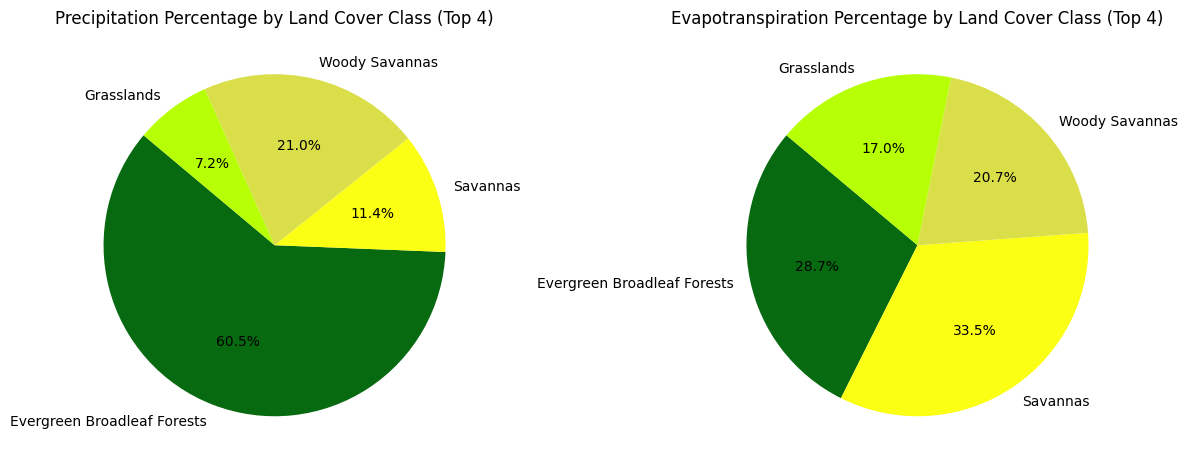

{1: {'area_m2': 250000, 'precipitation': 0, 'evapotranspiration': 0, 'precip_percentage': 0.0, 'evap_percentage': 0.0}, 10: {'area_m2': 1559462745.0980387, 'precipitation': 6002461.213707665, 'evapotranspiration': 26140845.25490198, 'precip_percentage': 7.051980617144897, 'evap_percentage': 16.876701187701723}, 11: {'area_m2': 22661764.705882356, 'precipitation': 217369.06423982076, 'evapotranspiration': 85897.09411764705, 'precip_percentage': 0.2553756489563875, 'evap_percentage': 0.05545572747092323}, 12: {'area_m2': 750000, 'precipitation': 3182.6187241077423, 'evapotranspiration': 18507, 'precip_percentage': 0.003739093807539477, 'evap_percentage': 0.011948240611011834}, 13: {'area_m2': 205500000, 'precipitation': 874668.0000753403, 'evapotranspiration': 31735, 'precip_percentage': 1.0276021057632436, 'evap_percentage': 0.020488324190331253}, 14: {'area_m2': 34000000, 'precipitation': 137105.53001451492, 'evapotranspiration': 784167, 'precip_percentage': 0.1610781820560092, 'evap_p

In [ ]:
results = analyze_land_cover_water_balance(clipped_landcover, annual_sum_CHIRPS, annual_sum_MODIS, pauteBasin)
print(results)